In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [36]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['gender'] = df['gender'].map({'Female':0, "Male":1})
df['Churn'] = df['Churn'].map({"No":0, "Yes":1})

In [38]:
features = ["gender", "SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
empty_values = df[features].isnull().sum() + (df[features] == '').sum()

total_rows = len(df)
empty_percentage = (empty_values / total_rows) * 100

empty_summary = pd.DataFrame ({
    "empty_count":empty_values,
    "empty_percentage":empty_percentage
})

print(empty_summary)

print("=="*20)
print(df[features].dtypes)

                empty_count  empty_percentage
gender                    0          0.000000
SeniorCitizen             0          0.000000
tenure                    0          0.000000
MonthlyCharges            0          0.000000
TotalCharges             11          0.156183
gender              int64
SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [39]:
df.dropna(inplace=True)

In [40]:
#seect features and target
features = ["gender", "SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
X = df[features]    #why?  is it a data frame
Y = df['Churn']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
model = models.Sequential([
    layers.Dense(64, activation='relu',input_shape=(5,)),   #Frist hiddel layer
    layers.Dense(32, activation='relu'),                    # second hiiden layer
    layers.Dense(16, activation='relu'),                    # third hidden layer
    layers.Dense(8, activation='relu'),                     # fourth hiodden latyer
    layers.Dense(1, activation='sigmoid')                   # Outpput layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="adam", loss='binary_crossentropy')
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.20, verbose=1)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7098 - loss: 0.6027 - val_accuracy: 0.7742 - val_loss: 0.4615
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.4794 - val_accuracy: 0.7858 - val_loss: 0.4455
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7827 - loss: 0.4534 - val_accuracy: 0.7902 - val_loss: 0.4417
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4400 - val_accuracy: 0.7920 - val_loss: 0.4420
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.4507 - val_accuracy: 0.7884 - val_loss: 0.4393
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4464 - val_accuracy: 0.7991 - val_loss: 0.4362
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.4404 - val_accuracy: 0.8027 - val_loss: 0.4381
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4435 - val_accuracy: 0

In [45]:
loss , accuracy  = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7967 - loss: 0.4329
Test Loss: 0.43711167573928833
Test Accuracy: 0.7917554974555969


In [47]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1) #convert prob into classes

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


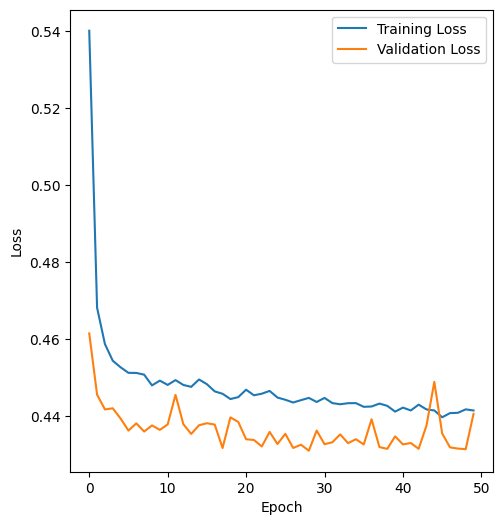

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()